# Kanji Radical Match

Loading data, training, and output.

In [1]:
import utils as u
import torch.nn as nn
import torch
from utils import KanjiFFNN
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
eng_to_rads = dict(list(u.load_eng_to_rads().items()))
eng_tens, rad_tens, eng_vocab, rad_vocab = u.dict_to_tensors(eng_to_rads)
in_tensor = eng_tens[:100]
out_tensor = rad_tens[:100]

In [3]:
print("Vocabulary size:", len(eng_vocab))
print("Radical vocabulary size:", len(rad_vocab))


Vocabulary size: 5191
Radical vocabulary size: 241


In [4]:
# Print a small sample of our data
print(eng_tens[:5])
print(eng_vocab[:5])
print(rad_tens[:5])
print(rad_vocab[:5])

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
['%' '(kokuji)' '(north) korea' '(parallels of) latitude' '-']
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
['ノ' 'ハ' 'マ' 'ユ' 'ヨ']


In [5]:
# Example
print(u.get_tensor_from_word("eight", eng_tens, eng_vocab))

tensor([0., 0., 0.,  ..., 0., 0., 0.])


In [6]:
e2r_model = KanjiFFNN(in_tensor.size(1), out_tensor.size(1))
criterion = nn.BCELoss()
optimizer = optim.Adam(e2r_model.parameters(), lr=1e-3)
lr_scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

In [7]:
epochs = 100

e2r_model.train_fit(in_tensor, out_tensor, optimizer, criterion, epochs=epochs, scheduler=lr_scheduler, verbose=True)

Epoch        1 Loss: 0.045074883848428726
Epoch        2 Loss: 0.0356101468205452
Epoch        3 Loss: 0.03073488548398018
Epoch        4 Loss: 0.027216890826821327
Epoch        5 Loss: 0.026168372482061386
Epoch        6 Loss: 0.025674745440483093
Epoch        7 Loss: 0.02523934468626976
Epoch        8 Loss: 0.024857385084033012
Epoch        9 Loss: 0.025236772373318672
Epoch       10 Loss: 0.025527795776724815
Epoch       11 Loss: 0.02536357194185257
Epoch       12 Loss: 0.024989189580082893
Epoch       13 Loss: 0.024687690660357475
Epoch       14 Loss: 0.02449590153992176
Epoch       15 Loss: 0.024321479722857475
Epoch       16 Loss: 0.02414742112159729
Epoch       17 Loss: 0.024024803191423416
Epoch       18 Loss: 0.023957673460245132
Epoch       19 Loss: 0.023912936449050903
Epoch       20 Loss: 0.023871615529060364
Epoch       21 Loss: 0.023830577731132507
Epoch       22 Loss: 0.023790782317519188
Epoch       23 Loss: 0.02375362440943718
Epoch       24 Loss: 0.02371980994939804
E

In [8]:
torch.save(e2r_model, "./models/model.pt")

In [9]:
torch.save(e2r_model.state_dict(), "./models/model_state_dict.pt")

In [10]:
loaded_model = KanjiFFNN(eng_tens.size(1), rad_tens.size(1))
loaded_model.load_state_dict(torch.load("./models/model_state_dict.pt"))
loaded_model.eval()

KanjiFFNN(
  (input): Linear(in_features=5191, out_features=200, bias=True)
  (hid1): Linear(in_features=200, out_features=300, bias=True)
  (hid2): Linear(in_features=300, out_features=200, bias=True)
  (output): Linear(in_features=200, out_features=241, bias=True)
)

In [11]:
tensor = u.get_tensor_from_word("eight", eng_tens, eng_vocab)
res = e2r_model(tensor)
print(res)

tensor([8.5300e-02, 2.5779e-02, 1.9273e-09, 1.5589e-09, 2.1339e-04, 3.0586e-01,
        7.4025e-10, 5.7737e-03, 8.1298e-02, 4.2233e-04, 2.1288e-09, 6.8956e-04,
        7.6379e-02, 7.1728e-03, 2.9252e-03, 1.6433e-09, 6.2371e-02, 5.8572e-02,
        6.0228e-04, 9.1054e-05, 2.6119e-02, 1.1300e-09, 4.4796e-03, 6.0789e-03,
        2.8509e-09, 1.6578e-09, 1.7765e-03, 1.5645e-02, 3.5914e-05, 3.0365e-03,
        2.0535e-09, 5.4268e-04, 1.3946e-09, 7.9001e-03, 2.1279e-03, 1.1930e-09,
        1.0130e-02, 5.9450e-04, 2.3348e-09, 9.4245e-04, 3.1974e-03, 4.1665e-03,
        2.8352e-02, 3.3708e-02, 1.1307e-09, 2.7555e-09, 9.3606e-03, 1.1744e-02,
        8.8719e-05, 5.9533e-02, 1.1812e-09, 3.4032e-03, 2.1689e-02, 2.6603e-05,
        1.0428e-02, 3.4761e-04, 3.2518e-02, 1.1184e-09, 6.6142e-03, 1.4518e-02,
        2.8833e-03, 2.0450e-03, 6.8391e-03, 2.2127e-03, 1.2516e-09, 1.4406e-09,
        3.8992e-04, 1.2476e-09, 1.6365e-09, 1.9900e-03, 4.0707e-05, 1.0406e-09,
        6.5204e-03, 1.0329e-02, 1.5569e-

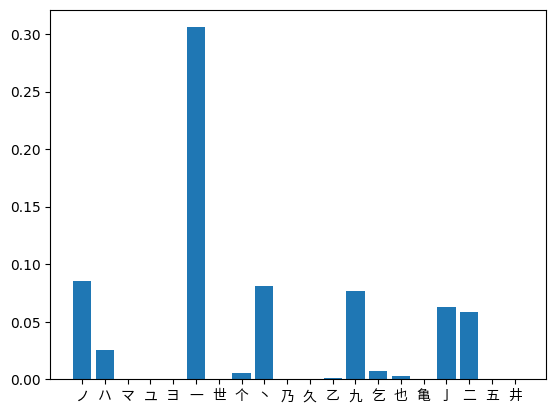

In [13]:
fprop = fm.FontProperties(fname='NotoSansCJKtc-Regular.otf')
radicals = rad_vocab[:20]
probabilities = res.tolist()[:20]

fig, axs = plt.subplots()
axs.bar(radicals, probabilities)
axs.set_xticks(range(len(radicals)), radicals, fontproperties=fprop)
plt.show()